In [ ]:
!pip install fastapi uvicorn pandas scikit-learn xgboost shap lime


#train model saving .joblib file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


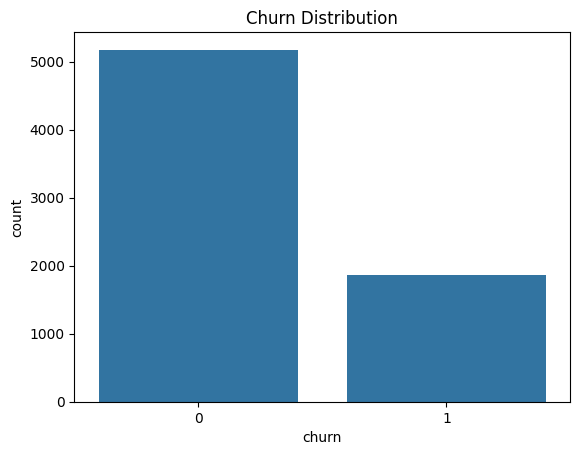

Evaluation for RandomForest:
Accuracy: 0.7999, Precision: 0.6631, Recall: 0.4960, AUC-ROC: 0.7026


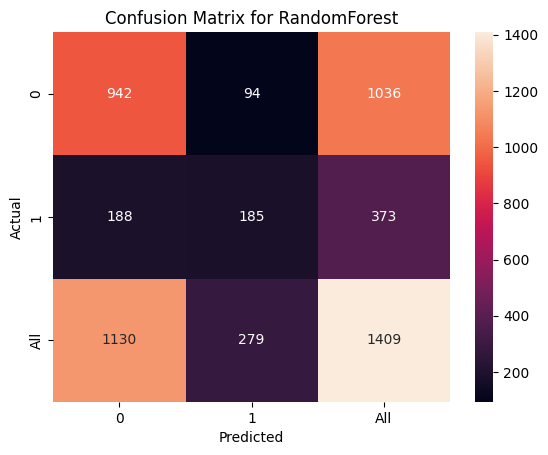

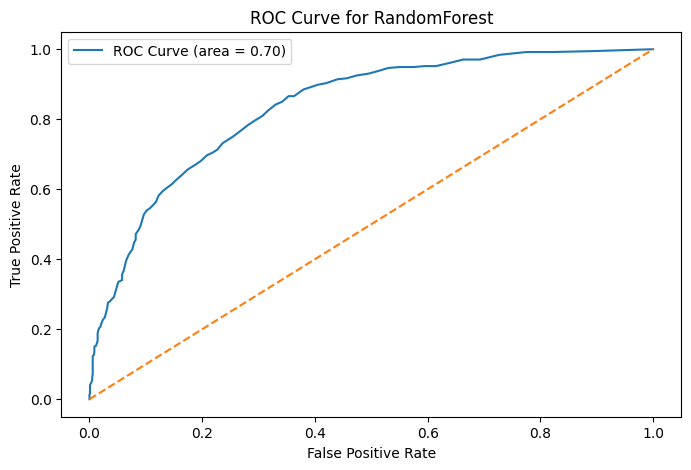

RandomForest model saved as RandomForest_model.joblib
Evaluation for LogisticRegression:
Accuracy: 0.8027, Precision: 0.6678, Recall: 0.5067, AUC-ROC: 0.7080


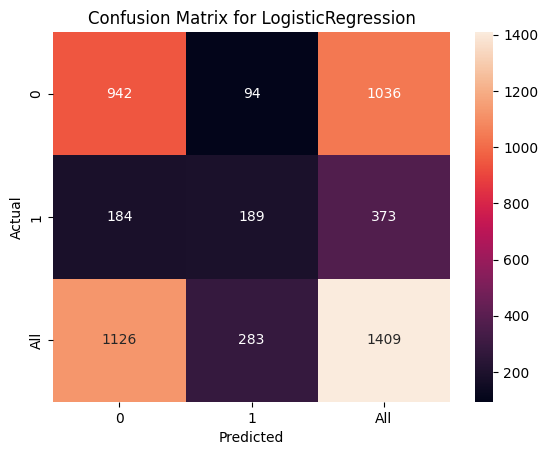

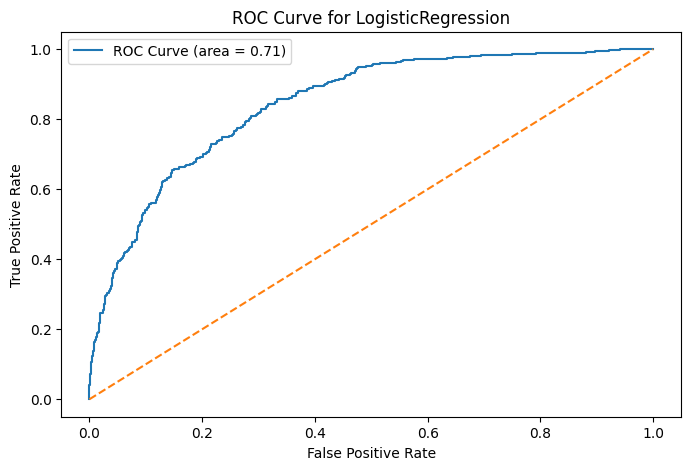

LogisticRegression model saved as LogisticRegression_model.joblib
Evaluation for XGBoost:
Accuracy: 0.7757, Precision: 0.5856, Recall: 0.5228, AUC-ROC: 0.6948


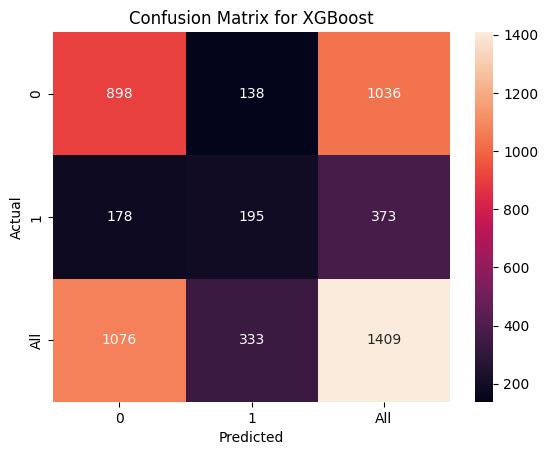

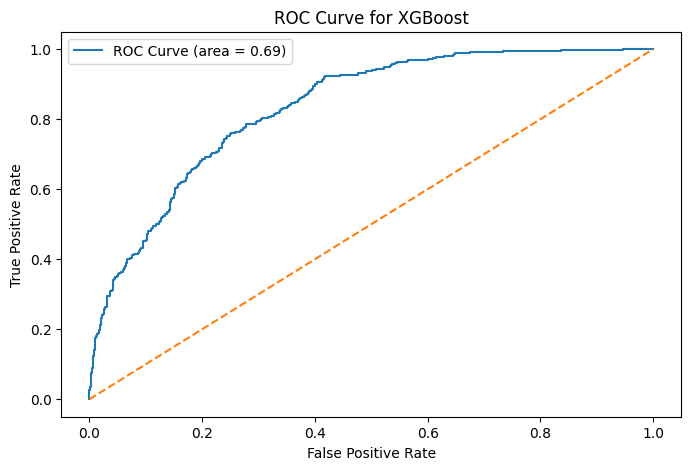

XGBoost model saved as XGBoost_model.joblib


In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import joblib  # Import joblib for saving models

# Load the dataset
df = pd.read_csv("/content/Telco-Customer-Churn.csv")

# Data Preprocessing Function
def preprocess_data(df):
    imputer = SimpleImputer(strategy='most_frequent')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    label_encoders = {}
    for column in df_imputed.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df_imputed[column] = le.fit_transform(df_imputed[column])
        label_encoders[column] = le
    return df_imputed

df_preprocessed = preprocess_data(df)

# Basic EDA
def quick_eda(df):
    print(df.info())
    print(df.describe())
    sns.countplot(x='churn', data=df)
    plt.title('Churn Distribution')
    plt.show()

quick_eda(df)

# Feature Engineering Function
def feature_engineering(df):
    if 'totalcharges' in df.columns and 'tenure' in df.columns:
        df['monthlycharges'] = df['totalcharges'] / (df['tenure'] + 1)
    return df

df_features = feature_engineering(df_preprocessed)

# Split into features and target
X = df_features.drop('churn', axis=1)
y = df_features['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(eval_metric='logloss')  # Removed use_label_encoder
}

# Function to evaluate and visualize the model performance
def evaluate_and_visualize(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUC-ROC: {auc:.4f}")

    # Plot confusion matrix
    sns.heatmap(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True), annot=True, fmt='d')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label=f'ROC Curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

# Train models, evaluate, and save them
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    evaluate_and_visualize(model, X_test_scaled, y_test, name)

    # Save the model to a file
    joblib.dump(model, f'{name}_model.joblib')
    print(f'{name} model saved as {name}_model.joblib')


#Testing custom test.csv

In [55]:
import pandas as pd
import joblib  # Import joblib for loading models

# Load the new dataset
new_df = pd.read_csv("/content/test_data.csv")  # Change to your new file path

# Data Preprocessing Function
def preprocess_data(df):
    # Assuming you need the same preprocessing steps as before
    imputer = SimpleImputer(strategy='most_frequent')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    label_encoders = {}
    for column in df_imputed.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df_imputed[column] = le.fit_transform(df_imputed[column])
        label_encoders[column] = le
    return df_imputed

# Preprocess the new data
new_df_preprocessed = preprocess_data(new_df)

# Feature Engineering Function
def feature_engineering(df):
    if 'totalcharges' in df.columns and 'tenure' in df.columns:
        df['monthlycharges'] = df['totalcharges'] / (df['tenure'] + 1)
    return df

new_df_features = feature_engineering(new_df_preprocessed)

# Load the trained models
models = {
    'RandomForest': joblib.load('RandomForest_model.joblib'),
    'LogisticRegression': joblib.load('LogisticRegression_model.joblib'),
    'XGBoost': joblib.load('XGBoost_model.joblib')
}

# Prepare the features for prediction (remove target column if present)
X_new = new_df_features.drop('churn', axis=1, errors='ignore')  # Ignore if 'churn' column is not present

# Scale the new features
scaler = StandardScaler()
X_new_scaled = scaler.fit_transform(X_new)  # Use the same scaler used during training

# Make predictions with each model
for name, model in models.items():
    predictions = model.predict(X_new_scaled)
    print(f"{name} Predictions: {predictions}")


RandomForest Predictions: [0 0 0 0 1 1 1 0 0]
LogisticRegression Predictions: [0 0 0 0 0 1 0 0 1]
XGBoost Predictions: [0 0 0 0 0 1 1 0 1]


In [38]:
!pip install fastapi uvicorn



In [39]:
!pip install joblib
